# **CS 4361/5361 Machine Learning**

**Final Exam**

# **Part 1**

## **A classification problem.**


Write a code cell to classify the Olivetti Faces data set using the Sklearn implementation of one of the algorithms you learned in this course.

Try to find the best combination of algorithm and parameters. Your grade will depend on the quality of your results and the analysis presented.

Download data and split into training and test set.

In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_olivetti_faces(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Show some of the image in the dataset.

In [ ]:
rs = np.random.randint(0,X_train.shape[0],size=3)
for r in rs:
  plt.figure()
  plt.imshow(X_train[r].reshape(64,64),cmap='gray')

**Enter you code here.**

Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:**

## **A regression problem.**

Write a code cell to predict the target value (house prices; a real value) in the California Housing dataset using the Sklearn implementation of one of the algorithms you learned in this course.

You may want to consider scaling the data and/or PCA preprocessing. 

Try to find the best combination of algorithm and parameters. Your grade will depend on the quality of your results and the analysis presented.

In [ ]:
from sklearn.datasets import fetch_california_housing

X, y = datasets.fetch_california_housing(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

**Enter you code here.**

Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:**

# **Part 2**

## **A classification problem.**


Write a code cell to classify the Olivetti Faces data set using a deep neural network, implemented using the Keras library.

Try to find the best combination of architecture and learning parameters. Your grade will depend on the quality of your results and the analysis presented.

Download data and split into training and test set.

In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_olivetti_faces(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


**Enter you code here.**

Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:**

## **A regression problem.**

Write a code cell to predict the target value (house prices; a real value) in the California Housing dataset using using a deep neural network, implemented using the Keras library.

You may want to consider scaling the data and/or PCA preprocessing. 

Try to find the best combination of architecture and learning parameters. Your grade will depend on the quality of your results and the analysis presented.

In [ ]:
from sklearn.datasets import fetch_california_housing

X, y = datasets.fetch_california_housing(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4361)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

**Enter you code here.**

Write a brief description of the algorithms you tried and describe the best approach you found, including parameter selection and explain why you think it works better than other approaches.

**Answer:**

# **Part 3**

## **Natural Language Processing**

### **Bag of Words**

Load libraries

In [ ]:
import bs4 as bs
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Read data

In [ ]:
def get_paragraph_list(url,skip):
    paragraphs = []
    data = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(data,'lxml')
    for paragraph in soup.find_all('p'):
        par  = paragraph.get_text()
        if par:
            if len(par)>=25:
              paragraphs.append(par)           
    return paragraphs[skip:]

url_list = ['http://www.gutenberg.org/files/215/215-h/215-h.htm', 'http://www.gutenberg.org/files/345/345-h/345-h.htm', 'http://www.gutenberg.org/files/1661/1661-h/1661-h.htm']

paragraphs = []
targets = []
first_par = []
skip = [1,4,0]
for u, url in enumerate(url_list):
    par = get_paragraph_list(url,skip[u])
    paragraphs = paragraphs + par
    targets = targets + [u for i in par]
    print('\nBook {} contains {} paragraphs'.format(u,len(par)))
    lengths = np.array([len(wl) for wl in par])
    print('Paragraph length stats:')
    print('min = {} max = {} mean = {:4f}'.format(np.min(lengths),np.max(lengths),np.mean(lengths)))
    #print('First paragraph:')
    #print(par[0])    


Split into training and test set

In [ ]:
np.random.seed(5361)
n = len(paragraphs)
ind = np.random.permutation(n)
x_test = [paragraphs[i] for i in ind[:n//5]]
x_train = [paragraphs[i] for i in ind[n//5:]]
y_test = np.array([targets[i] for i in ind[:n//5]])
y_train = np.array([targets[i] for i in ind[n//5:]])

In [ ]:
count_vect = CountVectorizer(strip_accents= 'unicode',token_pattern=r'\b[^\d\W]+\b')
count_vect.fit(x_train)

x_train_counts = np.array(count_vect.transform(x_train).todense())
x_test_counts = np.array(count_vect.transform(x_test).todense())

print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

print('Size of vocabulary:', len(count_vect.vocabulary_)) # This has to be the same as x_train_counts.shape[1] and x_test_counts.shape[1]


Training set has 3511 examples, 12543 features
Test set has 877 examples, 12543 features
Size of vocabulary: 12543


Recall that *count_vect.vocabulary_[w]* represents the column that contains the number of times word w appears in a document. 

Let's see which columns represent the counts for the book's protagonists' names. 


In [ ]:
for p in ['buck','dracula','holmes']:
  col = count_vect.vocabulary_[p]
  print('The number of times',p,'appears in document is stored in column',col)
  

Now let's classify the data:

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

Model accuracy: 0.9019
Confusion matrix:
 [[ 68   7   5]
 [  1 332  16]
 [  1  56 391]]


**Question 1.** Write a code cell that will print all the paragraphs in the test set that belong to class 0 ('The Call of the Wild') but were classified as belonging to class 2 ('The Adventures of Sherlock Holmes'). Hint: the paragraph represented by x_test_counts[i] is x_test[i], and belongs to class y_test[i]. 


The kidnapper undid the bloody wrappings and looked at his lacerated hand.
“If I don’t get the hydrophoby—”


“Gad, sir! Gad, sir!” stuttered a member of the latest dynasty, a
king of the Skookum Benches. “I offer you eight hundred for him, sir,
before the test, sir; eight hundred just as he stands.”


“Why shouldn’t it?” Charles demanded rather shortly.


“A hundred,” was the reply. “Wouldn’t take a sou less,
so help me.”



**Question 2.** The parameter alpha controls the amount of smoothing applied to the data by the Naive Bayes Classifier. Find a value of alpha that yields better results than the default value of 1.0. 

**Question 3.** Write a code cell that will train the MultinomialNB() classifier using all the available data (stored in *paragraphs*) and test it using the same data. You should get a higher accuracy than in the orginal experiment. Hint: Before splitting into training and test sets, the text data is in variable *paragraphs* and the labels in variable *targets*.


Model accuracy: 0.9574
Confusion matrix:
 [[ 322    7    0]
 [   1 1742   47]
 [   3  129 2137]]


### **Word embeddings**


Upload *glove50_10000.txt* containing word embeddings of 10000 words and 50 dimensions.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glove50_10000.txt to glove50_10000.txt


In [ ]:
def read_embeddings():
    # Reads n embeddings from file
    # Returns a dictionary were embedding[w] is the embeding of string w
    embedding = {}
    count = 0
    with open('glove50_10000.txt', encoding="utf8") as f: 
        for line in f: 
            ls = line.split(" ")
            emb = np.array([np.float32(x) for x in ls[1:]])
            embedding[ls[0]]=emb
    return embedding

embedding = read_embeddings()

In [ ]:
def distance(w1,w2,emb):
  # Return Euclidean distance from emb[w1] to emb[w2]
  e1,e2 = emb[w1], emb[w2]
  return np.linalg.norm(e1-e2)

In [ ]:
print(len(embedding))

10000


In [ ]:
vocabulary = list(embedding.keys())
print('Most common words:')
print(vocabulary[:10])
print('Least common words:')
print(vocabulary[-10:])

**Question 4.** Write a function that receives a word *w* and an embedding dictionary and returns the most similar word to *w* in the vocabulary. We define the most simlar word to w as the one with the smallest Eculidean distance to *w*.

In [ ]:
def most_similar(w,embedding):
  return 'UTEP'

In [ ]:
print('Most similar words:')
for w in ['tiny','data','cloud','awful','dense','steelers','dodgers','spain','mexico','virus','apple','texas','google','dallas','soccer','nadal',';','hispanic']:
  print(w,' -- ', most_similar(w, embedding))


Most similar words:
tiny  --  small
data  --  information
cloud  --  horizon
awful  --  terrible
dense  --  thick
steelers  --  broncos
dodgers  --  mets
spain  --  portugal
mexico  --  venezuela
virus  --  flu
apple  --  pc
texas  --  arizona
google  --  yahoo
dallas  --  denver
soccer  --  football
nadal  --  federer
;  --  ,
hispanic  --  latino


## **Keras functional API**

Consider the following dense neural network that classifies the MNIST dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt

from keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(x_train.reshape(x_train.shape[0], -1)/255)
x_test = np.float32(x_test.reshape(x_test.shape[0], -1)/255)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
def plot_results(history):
  fig, ax = plt.subplots()
  ax.plot(history.history['accuracy'],label = 'train')
  ax.plot(history.history['val_accuracy'],label = 'test')
  ax.set_title('Accuracy')
  ax.legend(loc='lower right')
  fig, ax = plt.subplots()
  ax.plot(history.history['loss'],label = 'train')
  ax.plot(history.history['val_loss'],label = 'test')
  ax.set_title('Loss')
  ax.legend(loc='upper right')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2815 - accuracy: 0.9146 - val_loss: 0.1628 - val_accuracy: 0.9470
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0970 - accuracy: 0.9698 - val_loss: 0.1371 - val_accuracy: 0.9601
Epoch 3/10
235/235 [========

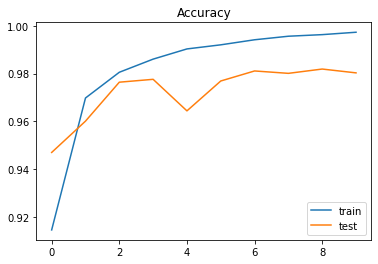

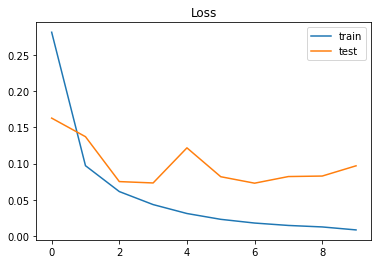

In [ ]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=300):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

dense = dense_model()
dense.summary() 
dense.compile(loss="categorical_crossentropy", metrics=["accuracy"])

history = dense.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
plot_results(history)

**Question 5.** Rewrite the *dense_model* function to implement the same neural network as above, but using the functional API. 

In [ ]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=300):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

dense = dense_model()
dense.summary() 
dense.compile(loss="categorical_crossentropy", metrics=["accuracy"])

history = dense.fit(
    x_train, y_train,
    epochs =  10, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
plot_results(history)